In [1]:
"""Data transformation for UK LSE data.

This script transforms the following data
- Price data
- Risk-free bond data (using Monthly average SONIA rate)

It is designed to be not following functional form or
objective orientated form to experiment different data
manipulations in notebooks easily.

All final data will be stored in a dictionary called `final`
"""
# library
import pandas as pd
from common_etl import missing_code

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

# storing transformed data
# file path
price_path = "~/db/asset_pricing/Finage_LSE_data/price_1month.csv"
risk_path = "~/db/asset_pricing/IUMASOIA.csv"

# date range
min_date = "2007-01-01"
max_date = "2022-01-01"

In [2]:
"""Risk free rate"""
sonia = pd.read_csv(risk_path)

sonia.columns = ["date", "SONIA"]
sonia["date"] = pd.to_datetime(sonia["date"])

sonia.head()

,date,SONIA
0,2022-02-28,0.4199
1,2022-01-31,0.1958
2,2021-12-31,0.1141
3,2021-11-30,0.0468
4,2021-10-31,0.0502


,SONIA_return
date,
2000-01-31,NaN
2000-02-29,0.091188
2000-03-31,-0.013491
2000-04-30,0.029972
2000-05-31,-0.003791


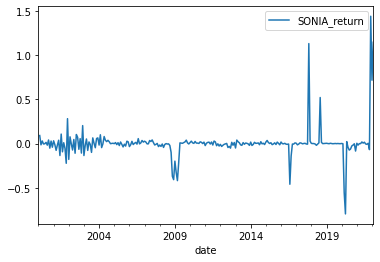

In [3]:

# compute risk free returns
rename_cols = {"SONIA": "SONIA_return"}
sonia = sonia.set_index("date")\
    .sort_values(by="date")\
    .astype("float")\
    .pct_change(periods=1)\
    .rename(columns=rename_cols)

# large spikes correspond to financial crisis
sonia.plot()

sonia.head()

In [4]:
"""Price data"""
raw = pd.read_csv(price_path)
raw["t"] = pd.to_datetime(
    raw["t"].str.replace("T12:00:00", "")
).dt.to_period("M").dt.to_timestamp("M")


raw[raw["symbol"] == "3IN"]

,symbol,o,h,l,c,v,t
0,3IN,1.38179,1.38179,1.38179,1.38179,0,2007-03-31
1,3IN,1.38179,1.38179,1.38179,1.38179,0,2007-04-30
2,3IN,1.38179,1.38179,1.38179,1.38179,0,2007-05-31
3,3IN,1.38179,1.38179,1.38179,1.38179,0,2007-07-31
4,3IN,1.38179,1.38179,1.38179,1.38179,0,2007-08-31
5,3IN,1.42289,1.42289,1.42289,1.42289,0,2007-09-30
6,3IN,1.42289,1.42289,1.42289,1.42289,0,2007-10-31
7,3IN,1.42289,1.42289,1.42289,1.42289,0,2007-11-30
8,3IN,1.42289,1.42289,1.42289,1.42289,0,2007-12-31
9,3IN,149.18500,154.81500,1.42289,1.42289,10297844,2008-01-31


In [5]:
rename_cols = {
    "t": "date",
    "o": "open",
    "h": "high",
    "l": "low",
    "c": "close",
    "v": "volume"
}
symbols = raw["symbol"].unique()
time_index = pd.date_range(
    start=min_date,
    end=max_date,
    freq="M"
)
index = pd.MultiIndex.from_product(
    [symbols, time_index], names=["symbol", "date"]
)
# Finage database has some error, duplicated 2020-06-01
data = raw.rename(mapper=rename_cols, axis=1)\
    .drop_duplicates(subset=["symbol", "date"])\
    .set_index(["symbol", "date"])\
    .sort_values(by=["symbol", "date"])\
    .reindex(index)

# compute returns
data = data.groupby("symbol")\
    .pct_change(periods=1)\
    .combine_first(sonia)

data.loc["3IN"]

,SONIA_return,close,high,low,open,volume
date,,,,,,
2007-01-31,0.027280,NaN,NaN,NaN,NaN,NaN
2007-02-28,0.018227,NaN,NaN,NaN,NaN,NaN
2007-03-31,-0.002839,NaN,NaN,NaN,NaN,NaN
2007-04-30,-0.002206,0.000000,0.000000,0.000000,0.000000,NaN
2007-05-31,0.035207,0.000000,0.000000,0.000000,0.000000,NaN
2007-06-30,0.024006,0.000000,0.000000,0.000000,0.000000,NaN
2007-07-31,0.041734,0.000000,0.000000,0.000000,0.000000,NaN
2007-08-31,0.011860,0.000000,0.000000,0.000000,0.000000,NaN
2007-09-30,-0.014900,0.029744,0.029744,0.029744,0.029744,NaN


In [6]:
# compute excess returns
for col in ["close", "high", "low", "open"]:
    data.loc[:, col + "_excess"] = data.loc[:, col] - data.loc[:, "SONIA_return"]

date_filter = data.index.get_level_values("date") >= "2008-01-01"
data = data.loc[date_filter]

data.loc["3IN"]

,SONIA_return,close,high,low,open,volume,close_excess,high_excess,low_excess,open_excess
date,,,,,,,,,,
2008-01-31,-0.016350,0.000000,107.803210,0.000000,103.846474,inf,0.016350,107.819560,0.016350,103.862824
2008-02-29,-0.031372,0.000000,0.040907,0.000000,0.004719,-0.291939,0.031372,0.072279,0.031372,0.036091
2008-03-31,-0.004576,0.044508,0.006553,0.044508,0.058683,-0.152097,0.049084,0.011129,0.049084,0.063259
2008-04-30,-0.042918,0.000000,0.015185,0.000000,-0.024388,0.257975,0.042918,0.058103,0.042918,0.018530
2008-05-31,-0.009567,0.000000,0.025640,0.000000,0.034092,-0.218352,0.009567,0.035207,0.009567,0.043659
2008-06-30,0.000239,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000239,-0.000239,-0.000239,-0.000239
2008-07-31,-0.004511,0.000000,0.004168,0.000000,0.041757,0.994723,0.004511,0.008679,0.004511,0.046268
2008-08-31,-0.002575,0.000000,-0.020750,0.000000,-0.021100,-0.571072,0.002575,-0.018175,0.002575,-0.018525
2008-09-30,-0.020913,0.034093,0.000000,0.034093,0.002156,1.759306,0.055006,0.020913,0.055006,0.023069


In [7]:
# export data
final = data.loc[:, "close_excess"].fillna(missing_code)
final.to_csv("../data/price.csv")